In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')


In [2]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, MaxAbsScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA
from sklearn.linear_model import LassoCV
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [3]:
# Set plot style
plt.style.use('seaborn-v0_8')

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df=pd.read_csv('/content/drive/My Drive/cleaned_company_data.csv')
df

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,...,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other,isClosed,active_years
0,2007,2008.0,2008.0,1.0,5000000.0,2008.000000,2012.000000,3.000000,14.0,37.386052,...,False,False,False,False,False,False,True,False,0,1.0
1,2003,2011.0,2012.0,3.0,10125293.0,2010.000000,2010.000000,1.000000,6.0,30.267153,...,False,False,False,False,False,False,True,False,1,9.0
2,2003,2003.0,2003.0,1.0,250000.0,2007.000000,2007.000000,1.000000,2.0,-27.469771,...,False,False,False,False,False,False,False,False,1,0.0
3,2006,2011.0,2012.0,2.0,11300000.0,2010.319614,2011.064309,1.598928,2.0,42.018989,...,False,False,False,False,False,False,True,False,1,6.0
4,2006,2007.0,2007.0,2.0,414840.0,2010.319614,2011.064309,1.598928,2.0,48.856614,...,False,True,False,False,False,False,False,False,1,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15234,2003,2006.0,2006.0,1.0,14500000.0,2006.000000,2010.000000,3.000000,19.0,37.441883,...,False,False,False,False,False,False,True,False,0,3.0
15235,2007,2008.0,2008.0,1.0,798679.0,2008.000000,2008.000000,3.000000,2.0,13.113222,...,False,False,False,False,False,False,False,True,1,1.0
15236,2011,2011.0,2011.0,1.0,500000.0,2011.000000,2011.000000,1.000000,2.0,28.805267,...,False,False,False,False,False,False,False,False,1,0.0
15237,2007,2008.0,2008.0,1.0,750000.0,2013.000000,2013.000000,1.000000,14.0,37.338208,...,False,False,False,False,False,False,True,False,1,1.0


1. Understand the Domain and Problem Statement

In [6]:
df.shape

(15239, 35)

In [7]:
# Check data types
print("\nData Types:")
print(df.dtypes)


Data Types:
founded_at                int64
first_funding_at        float64
last_funding_at         float64
funding_rounds          float64
funding_total_usd       float64
first_milestone_at      float64
last_milestone_at       float64
milestones              float64
relationships           float64
lat                     float64
lng                     float64
category_advertising       bool
category_analytics         bool
category_biotech           bool
category_ecommerce         bool
category_enterprise        bool
category_games_video       bool
category_hardware          bool
category_mobile            bool
category_other             bool
category_software          bool
category_web               bool
country_AUS                bool
country_CAN                bool
country_DEU                bool
country_ESP                bool
country_FRA                bool
country_GBR                bool
country_IND                bool
country_IRL                bool
country_ISR                

In [8]:
# Check target distribution
df['isClosed'].value_counts(normalize=True)

,proportion
isClosed,
1,0.913971
0,0.086029


In [9]:
# Review feature data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15239 entries, 0 to 15238
Data columns (total 35 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   founded_at            15239 non-null  int64  
 1   first_funding_at      15239 non-null  float64
 2   last_funding_at       15239 non-null  float64
 3   funding_rounds        15239 non-null  float64
 4   funding_total_usd     15239 non-null  float64
 5   first_milestone_at    15239 non-null  float64
 6   last_milestone_at     15239 non-null  float64
 7   milestones            15239 non-null  float64
 8   relationships         15239 non-null  float64
 9   lat                   15239 non-null  float64
 10  lng                   15239 non-null  float64
 11  category_advertising  15239 non-null  bool   
 12  category_analytics    15239 non-null  bool   
 13  category_biotech      15239 non-null  bool   
 14  category_ecommerce    15239 non-null  bool   
 15  category_enterprise

In [10]:
# Quick numerical summary
df.describe()


,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,isClosed,active_years
count,15239.000000,15239.000000,15239.000000,15239.000000,1.523900e+04,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000,15239.000000
mean,2006.840738,2010.385364,2011.031877,1.487565,4.699328e+06,2010.322609,2011.067564,1.600004,4.949628,38.575739,-64.953888,0.913971,4.216681
std,6.842674,2.520872,2.312982,0.690883,6.349963e+06,2.336961,2.167344,0.624291,13.701495,13.252342,62.639835,0.280416,6.405146
min,1906.000000,1984.000000,1984.000000,1.000000,2.910000e+02,1976.000000,1976.000000,1.000000,1.000000,-42.883611,-158.056896,0.000000,0.000000
25%,2005.000000,2009.000000,2010.000000,1.000000,4.350000e+05,2010.319614,2011.064309,1.000000,2.000000,35.994033,-118.255075,1.000000,1.000000
50%,2009.000000,2011.000000,2012.000000,1.000000,1.800000e+06,2010.319614,2011.064309,1.598928,4.000000,39.739236,-80.290762,1.000000,2.000000
75%,2011.000000,2012.000000,2013.000000,2.000000,6.400000e+06,2012.000000,2012.000000,2.000000,5.000000,43.653226,-3.703790,1.000000,5.000000
max,2013.000000,2013.000000,2013.000000,3.000000,2.922000e+07,2014.000000,2014.000000,7.000000,1046.000000,70.919200,174.811945,1.000000,106.000000


2. Feature Selection

In [11]:
# 2.1 Remove irrelevant features (example: lat/lng may not be useful without geospatial context)
irrelevant_cols = ['lat', 'lng']
df.drop(columns=irrelevant_cols, inplace=True)


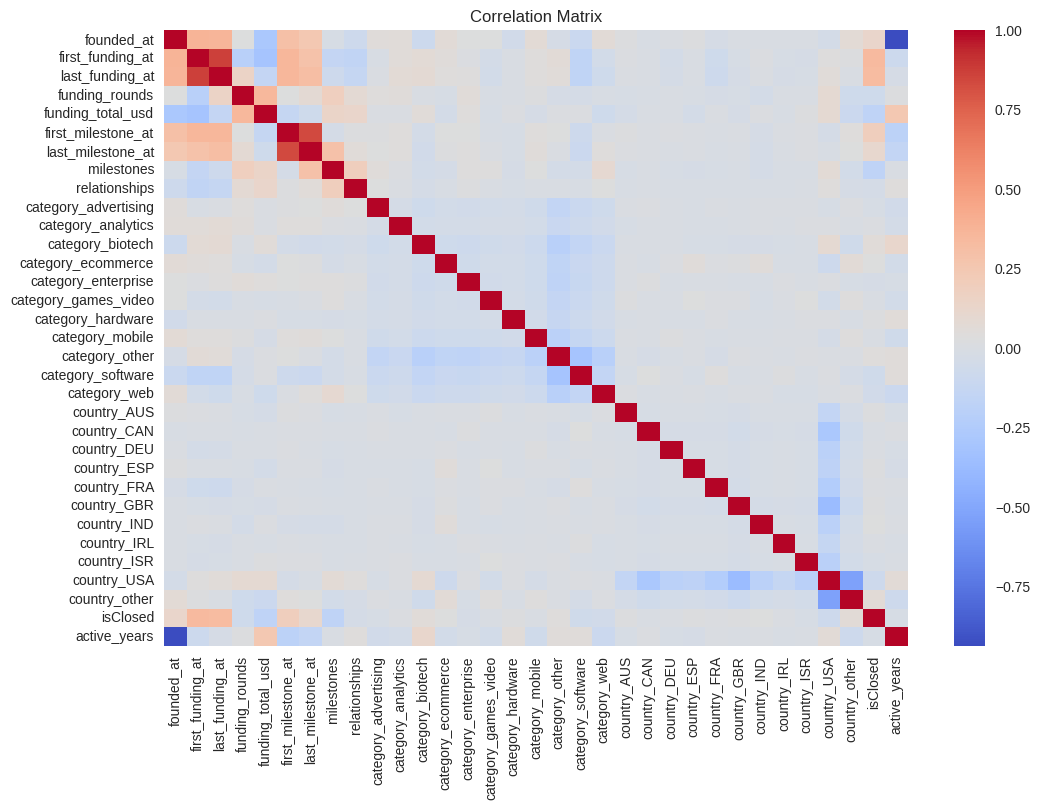

In [12]:
# 2.2 Handle Multicollinearity
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
corr_matrix

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,category_advertising,...,country_ESP,country_FRA,country_GBR,country_IND,country_IRL,country_ISR,country_USA,country_other,isClosed,active_years
founded_at,1.000000,0.376675,0.365374,0.029336,-0.280780,0.296250,0.245874,-0.020666,-0.081030,0.051321,...,0.021091,-0.028376,-0.002559,-0.003639,-0.000169,-0.001880,-0.042328,0.071124,0.126073,-0.937382
first_funding_at,0.376675,1.000000,0.869615,-0.209084,-0.309490,0.357709,0.288194,-0.138494,-0.154799,-0.011691,...,-0.000357,-0.067754,-0.020870,0.016026,-0.020452,-0.022789,0.034034,0.021414,0.334066,-0.088376
last_funding_at,0.365374,0.869615,1.000000,0.152120,-0.135191,0.360925,0.313629,-0.075725,-0.129337,0.007199,...,-0.006206,-0.075831,-0.023120,0.005895,-0.022887,-0.018438,0.059809,-0.004981,0.329822,-0.029230
funding_rounds,0.029336,-0.209084,0.152120,1.000000,0.349988,0.028260,0.082992,0.184406,0.076773,0.046010,...,-0.013470,-0.025530,-0.017154,-0.036887,-0.004778,-0.006043,0.085701,-0.067201,-0.071068,0.020970
funding_total_usd,-0.280780,-0.309490,-0.135191,0.349988,1.000000,-0.131116,-0.072148,0.144303,0.122420,0.004829,...,-0.042946,0.002585,-0.022160,0.014234,-0.008269,0.017173,0.087567,-0.091555,-0.172434,0.249773
first_milestone_at,0.296250,0.357709,0.360925,0.028260,-0.131116,1.000000,0.837055,-0.032122,0.020251,0.021749,...,0.005489,-0.005631,0.004494,-0.029182,0.003120,0.010051,-0.034765,0.042010,0.193468,-0.187321
last_milestone_at,0.245874,0.288194,0.313629,0.082992,-0.072148,0.837055,1.000000,0.292484,0.059536,0.029079,...,0.004039,-0.011308,-0.002193,-0.031977,-0.003659,0.011606,-0.010043,0.025068,0.108828,-0.150089
milestones,-0.020666,-0.138494,-0.075725,0.184406,0.144303,-0.032122,0.292484,1.000000,0.197105,0.052999,...,-0.022440,-0.017919,-0.011177,-0.032135,-0.006910,-0.006730,0.072844,-0.051252,-0.170073,-0.004931
relationships,-0.081030,-0.154799,-0.129337,0.076773,0.122420,0.020251,0.059536,0.197105,1.000000,0.025977,...,-0.011717,-0.011393,-0.011502,-0.008615,-0.007557,-0.005170,0.042590,-0.026162,-0.030733,0.039241
category_advertising,0.051321,-0.011691,0.007199,0.046010,0.004829,0.021749,0.029079,0.052999,0.025977,1.000000,...,-0.009849,0.005894,-0.002895,0.002622,0.002013,0.008263,-0.015678,0.015978,-0.017678,-0.053088


In [14]:
#Remove one of any highly correlated (>0.9) features
threshold = 0.9
corr_pairs = corr_matrix.abs().unstack().sort_values(ascending=False)
high_corr = [(a,b) for a,b in corr_pairs.index if a!=b and corr_matrix.loc[a,b] > threshold]
high_corr

[]

In [15]:
df.shape

(15239, 33)

In [16]:
# 2.3 Feature Importance - Mutual Information
X = df.drop(columns=['isClosed'])
y = df['isClosed']

In [17]:
mi_scores = mutual_info_classif(X, y)
mi_df = pd.DataFrame({'Feature': X.columns, 'MI Score': mi_scores})
print("\nTop 10 Features by Mutual Information:")
print(mi_df.sort_values('MI Score', ascending=False).head(10))



Top 10 Features by Mutual Information:
               Feature  MI Score
1     first_funding_at  0.060989
2      last_funding_at  0.055095
0           founded_at  0.030671
5   first_milestone_at  0.028038
4    funding_total_usd  0.023657
7           milestones  0.018436
6    last_milestone_at  0.014834
8        relationships  0.009337
29         country_USA  0.007724
11    category_biotech  0.004813


CREATE NEW FEATURES

In [18]:
# Date Features
date_cols = ['founded_at', 'first_funding_at', 'last_funding_at',
             'first_milestone_at', 'last_milestone_at']

for col in date_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

if 'founded_at' in df.columns:
    df['founded_year'] = df['founded_at'].dt.year

if 'first_funding_at' in df.columns:
    df['first_funding_year'] = df['first_funding_at'].dt.year

# Funding per round
if 'funding_total_usd' in df.columns and 'funding_rounds' in df.columns:
    df['funding_per_round'] = df['funding_total_usd'] / df['funding_rounds'].replace(0, np.nan)

# Milestones per year
if 'milestones' in df.columns and 'active_years' in df.columns:
    df['milestones_per_year'] = df['milestones'] / (df['active_years'] + 1e-5)


FEATURE TRANSFORMATION

In [20]:
# Log transform skewed numerical columns
skewed_cols = ['funding_total_usd', 'funding_per_round', 'milestones_per_year']
for col in skewed_cols:
    if col in df.columns:
        df[col + '_log'] = np.log1p(df[col])


In [21]:
# Polynomial interaction between funding_rounds and milestones
if 'funding_rounds' in df.columns and 'milestones' in df.columns:
    poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
    poly_features = poly.fit_transform(df[['funding_rounds', 'milestones']])
    poly_df = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(['funding_rounds', 'milestones']))
    df = pd.concat([df, poly_df], axis=1)

FEATURE SCALING

In [22]:
scaler = StandardScaler()
num_cols = df.select_dtypes(include=[np.number]).columns.drop("isClosed", errors='ignore')
df[num_cols] = scaler.fit_transform(df[num_cols])


In [23]:
num_cols

Index(['funding_rounds', 'funding_total_usd', 'milestones', 'relationships',
       'active_years', 'founded_year', 'first_funding_year',
       'funding_per_round', 'milestones_per_year', 'funding_total_usd_log',
       'funding_per_round_log', 'milestones_per_year_log', 'funding_rounds',
       'milestones', 'funding_rounds milestones'],
      dtype='object')

FEATURE REDUCTION

In [24]:
# PCA to retain 95% variance
from sklearn.impute import SimpleImputer

# Impute missing values
imputer = SimpleImputer(strategy='mean')
X_imputed = imputer.fit_transform(df[num_cols])


pca = PCA(n_components=0.95, random_state=42)
X_pca = pca.fit_transform(X_imputed)
print("PCA reduced shape:", X_pca.shape)

PCA reduced shape: (15239, 6)


In [25]:
# LassoCV for embedded selection
lasso = LassoCV(cv=5, random_state=42)
lasso.fit(X, y)
lasso_selected = X.columns[lasso.coef_ != 0].tolist()
print("\nLasso Selected Features:", lasso_selected)



Lasso Selected Features: ['funding_total_usd']


In [28]:
# RFE with RandomForest
model = RandomForestClassifier(random_state=42)
rfe = RFE(model, n_features_to_select=10)
rfe.fit(X, y)
print("\nRFE Selected Features:", list(X.columns[rfe.support_]))



RFE Selected Features: ['founded_at', 'first_funding_at', 'last_funding_at', 'funding_rounds', 'funding_total_usd', 'first_milestone_at', 'last_milestone_at', 'milestones', 'relationships', 'active_years']


SAVE FINAL FEATURE SET

In [29]:
df.to_csv('/content/drive/My Drive/feature_engineered_company_data.csv', index=False)
print("\nFeature engineered dataset saved successfully!")


Feature engineered dataset saved successfully!


In [30]:
df.head()

,founded_at,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,category_advertising,...,founded_year,first_funding_year,funding_per_round,milestones_per_year,funding_total_usd_log,funding_per_round_log,milestones_per_year_log,funding_rounds,milestones,funding_rounds milestones
0,1970-01-01 00:00:00.000002007,1970-01-01 00:00:00.000002008,1970-01-01 00:00:00.000002008,-0.705736,0.047352,1970-01-01 00:00:00.000002008,1970-01-01 00:00:00.000002012,2.242612,0.660561,False,...,0.0,0.0,0.423661,-0.413076,0.663481,0.874693,-0.232667,-0.705736,2.242612,0.299816
1,1970-01-01 00:00:00.000002003,1970-01-01 00:00:00.000002011,1970-01-01 00:00:00.000002012,2.189205,0.854516,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002010,-0.961128,0.076664,False,...,0.0,0.0,0.052146,-0.413126,1.035662,0.654767,-0.535814,2.189205,-0.961128,0.299816
2,1970-01-01 00:00:00.000002003,1970-01-01 00:00:00.000002003,1970-01-01 00:00:00.000002003,-0.705736,-0.700709,1970-01-01 00:00:00.000002007,1970-01-01 00:00:00.000002007,-0.961128,-0.215285,False,...,0.0,0.0,-0.662372,1.307659,-0.916669,-0.801684,2.163927,-0.705736,-0.961128,-0.809875
3,1970-01-01 00:00:00.000002006,1970-01-01 00:00:00.000002011,1970-01-01 00:00:00.000002012,0.741735,1.039516,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002011,-0.001723,-0.215285,False,...,0.0,0.0,0.572276,-0.413123,1.093560,0.943085,-0.504838,0.741735,-0.001723,0.409596
4,1970-01-01 00:00:00.000002006,1970-01-01 00:00:00.000002007,1970-01-01 00:00:00.000002007,0.741735,-0.674748,1970-01-01 00:00:00.000002010,1970-01-01 00:00:00.000002011,-0.001723,-0.215285,False,...,0.0,0.0,-0.672107,-0.413100,-0.649543,-0.906167,-0.334715,0.741735,-0.001723,0.409596
